In [0]:
import pandas as pd
import numpy as np

In [0]:
fraud_full = pd.read_csv("Fraud_Data.csv")

In [0]:
fraud_full.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [0]:
ipadr= pd.read_csv("IpAddress_to_Country.csv")

In [0]:
fraud.shape

In [0]:
list  = ipadr.values.tolist()
incr=0
def find_ip(ip):
    global incr
    incr +=1
    if incr%1000 == 0:
        print("find ip: ",incr)    
    for item in list:
        if (ip>item[0] and ip<item[1]):
            return item[2]
    return 'unknown'

In [0]:
#fraud['country'] = fraud.ip_address.apply(lambda x: find_ip(x))

In [0]:
fraud = pd.read_csv("Fraud_Data_country.csv")

In [0]:
fraud['country'].describe()

count            151112
unique              182
top       United States
freq              58049
Name: country, dtype: object

In [0]:
fraud.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [0]:
(fraud['country'] == 'unknown').sum()

21966

In [0]:
#fraud.to_csv("semaine 4\\fraud_data_country.csv")

In [0]:
fraud = fraud.drop(["Unnamed: 0","ip_address"],axis = 1)

In [0]:
#fraud = fraud.drop("device_id",axis = 1)

In [0]:
fraud.describe()

,user_id,purchase_value,age,class
count,151112.000000,151112.000000,151112.000000,151112.000000
mean,200171.040970,36.935372,33.140704,0.093646
std,115369.285024,18.322762,8.617733,0.291336
min,2.000000,9.000000,18.000000,0.000000
25%,100642.500000,22.000000,27.000000,0.000000
50%,199958.000000,35.000000,33.000000,0.000000
75%,300054.000000,49.000000,39.000000,0.000000
max,400000.000000,154.000000,76.000000,1.000000


In [0]:
#fraud = fraud.drop("device_by_purchase",axis = 1)

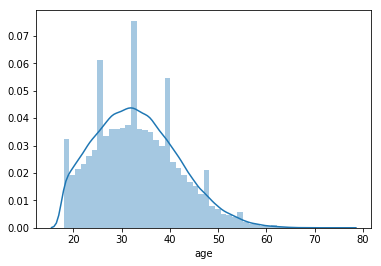

In [0]:
import seaborn as sns
sns.distplot(fraud.age)


In [0]:
""""fraud_data['country'] = (ip_address.apply(lambda x: 
                                          IP_to_country.query('lower_bound_ip_address <= @x <= upper_bound_ip_address').index.values)
                         .apply(lambda x: x[0] if len(x) else -1)).apply(lambda x: IP_to_country.country[x] if x != -1 else x)"""

'"fraud_data[\'country\'] = (ip_address.apply(lambda x: \n                                          IP_to_country.query(\'lower_bound_ip_address <= @x <= upper_bound_ip_address\').index.values)\n                         .apply(lambda x: x[0] if len(x) else -1)).apply(lambda x: IP_to_country.country[x] if x != -1 else x)'

In [0]:
fraud.groupby(by="source").mean()
#sns.barplot(fraud.source,fraud.source.sum())

,user_id,purchase_value,age,class
source,,,,
Ads,200168.717723,36.925452,33.133832,0.092066
Direct,200214.005553,36.940521,33.200810,0.105370
SEO,200151.635123,36.942572,33.117133,0.089285


fraud.isnull().sum()

In [0]:
date1 = fraud.head(1).signup_time

In [0]:
date2 = fraud.head(1).purchase_time

In [0]:
from datetime import timedelta

In [0]:
import datetime

In [0]:
str(date1[0])

'2015-02-24 22:55:49'

In [0]:
from dateutil import parser
dt = parser.parse(str(date1[0]))
dt2 = parser.parse(str(date2[0]))

In [0]:
dt.day

24

In [0]:
dt2

datetime.datetime(2015, 4, 18, 2, 47, 11)

In [0]:
d_date = dt2-dt

In [0]:
d_date.seconds

13882

In [0]:
fraud['elapse'] = fraud.apply(lambda x : (parser.parse(str(x.purchase_time)) - parser.parse(str(x.signup_time))).seconds,axis = 1)

In [0]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country,elapse
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,Japan,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,United States,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,unknown,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,United States,41461


In [0]:
fraud[fraud["class"] == 0].elapse.mean()

43107.882674630004

In [0]:
fraud[fraud["class"] == 1].elapse.mean()

19985.661720019787

In [0]:
fraud.groupby(by = "class").describe().T

class                             0              1
user_id        count  136961.000000   14151.000000
               mean   200098.920123  200869.065366
               std    115239.994370  116615.028662
               min         2.000000      39.000000
               25%    100789.000000   98314.000000
               50%    199909.000000  200526.000000
               75%    299724.000000  303018.000000
               max    399997.000000  400000.000000
purchase_value count  136961.000000   14151.000000
               mean       36.929418      36.993004
               std        18.315064      18.397654
               min         9.000000       9.000000
               25%        22.000000      22.000000
               50%        35.000000      35.000000
               75%        49.000000      49.000000
               max       154.000000     111.000000
age            count  136961.000000   14151.000000
               mean       33.122356      33.318281
               std         8.622678       8.568001
               min        18.000000      18.000000
               25%        27.000000      27.000000
               50%        33.000000      33.000000
               75%        39.000000      39.000000
               max        76.000000      68.000000
elapse         count  136961.000000   14151.000000
               mean    43107.882675   19985.661720
               std     24924.165935   27373.875395
               min         1.000000       1.000000
               25%     21536.000000       1.000000
               50%     43152.000000       1.000000
               75%     64652.000000   39792.500000
               max     86399.000000   86382.000000

In [0]:
fraud["class"].mean()

0.09364577267192546

In [0]:
fraud[fraud["class"] == 0].sample(20)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country,elapse
88345,273604,2015-06-15 20:37:52,2015-06-21 08:02:34,46,QPZVUFVJJLURF,Ads,Chrome,M,25,0,United States,41082
24200,102277,2015-03-22 00:39:37,2015-04-11 16:53:57,25,OWWJYGWQGOPLX,Ads,Safari,M,19,0,Spain,58460
132094,216120,2015-05-18 03:27:05,2015-05-21 02:40:21,23,ZYYHNBIAUGCEF,Ads,FireFox,F,53,0,unknown,83596
51434,383024,2015-07-05 23:39:30,2015-08-30 06:47:49,26,YAPSGITXIBFCB,Ads,IE,M,28,0,Japan,25699
28754,299260,2015-06-15 18:33:56,2015-09-29 23:27:59,24,DLGSVBAAPFIAF,Ads,Safari,M,45,0,United States,17643
57044,270496,2015-07-19 14:31:59,2015-10-10 13:19:28,28,ZILMLXNMZDQTN,SEO,Safari,F,24,0,France,82049
200,309239,2015-05-29 09:54:34,2015-08-09 08:03:26,22,CXPAACGCMEJFT,Direct,IE,F,22,0,France,79732
67867,239302,2015-03-28 14:53:44,2015-05-04 10:23:18,79,BAGOHAHLYTWQV,Ads,IE,M,36,0,United States,70174
11812,250038,2015-06-20 08:36:51,2015-07-20 03:40:22,29,KHWTLHTPUSYMH,Direct,Opera,M,23,0,United States,68611
13287,347030,2015-06-07 06:23:56,2015-07-02 12:56:34,47,NSHUQSPMAYYPH,Ads,IE,M,18,0,Indonesia,23558


In [0]:
#fraud.to_csv("semaine 4\\fraud_data_country2.csv")

In [0]:
country_class = fraud.groupby(by="country").mean().sort_values(by="class",ascending = False)

In [0]:
country_class

,user_id,purchase_value,age,class,elapse
country,,,,,
Turkmenistan,138998.000000,37.000000,29.000000,1.000000,77612.000000
Namibia,219949.826087,50.869565,28.739130,0.434783,25409.304348
Sri Lanka,202067.258065,39.548387,28.870968,0.419355,29327.419355
Luxembourg,198503.611111,36.486111,35.208333,0.388889,27950.486111
Virgin Islands (U.S.),228766.333333,43.333333,29.333333,0.333333,48038.666667
Ecuador,206779.943396,39.084906,33.566038,0.264151,33062.273585
Tunisia,194676.440678,30.838983,32.796610,0.262712,33037.881356
Peru,224237.361345,35.378151,34.344538,0.260504,35921.420168
Bolivia,191454.056604,37.528302,35.207547,0.245283,32774.132075


In [0]:
fraud["cl_country"] = fraud.country.apply(lambda x : country_class.loc[x]["class"])

In [0]:
fraud.head(20)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country,elapse,cl_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,Japan,13882,0.097865
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,United States,17944,0.095626
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,United States,1,0.095626
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,unknown,60085,0.085723
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,United States,41461,0.095626
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,0,Canada,7331,0.116975
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,0,unknown,17825,0.085723
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,0,United States,35129,0.095626
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,0,China,51800,0.086642
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,0,United States,18953,0.095626


In [0]:
from sklearn.preprocessing import KBinsDiscretizer

In [0]:
fraud_final = fraud.drop(["signup_time","purchase_time","country","user_id","device_id"],axis = 1)

In [0]:
fraud_final = pd.get_dummies(fraud_final)

In [0]:
fraud_final.shape

(151112, 15)

In [0]:
fraud_final.head()

,purchase_value,age,class,elapse,cl_country,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,34,39,0,13882,0.097865,0,0,1,1,0,0,0,0,0,1
1,16,53,0,17944,0.095626,1,0,0,1,0,0,0,0,1,0
2,15,53,1,1,0.095626,0,0,1,0,0,0,1,0,0,1
3,44,41,0,60085,0.085723,0,0,1,0,0,0,0,1,0,1
4,39,45,0,41461,0.095626,1,0,0,0,0,0,0,1,0,1


In [0]:
X = fraud_final.drop("class",axis =1)
y = fraud_final["class"]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#X_train_rf = pd.DataFrame(X_train, columns=fraud_final.drop("class",axis =1).columns).drop("elapse",axis = 1)
#X_train_rf
#X_test_rf = pd.DataFrame(X_test, columns=fraud_final.drop("class",axis =1).columns).drop("elapse",axis = 1)


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators=200, max_depth=4,random_state=0,class_weight="balanced")

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[20,50,100], 'max_depth':[ 3, 5]}
rf_grid = GridSearchCV(rf, parameters, cv=5)
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='w

In [0]:
rf_grid.best_estimator_.score(X_test,y_test)

0.9562579962059381

In [0]:
rf_grid.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [0]:
X.head()

,purchase_value,age,elapse,cl_country,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,34,39,13882,0.097865,0,0,1,1,0,0,0,0,0,1
1,16,53,17944,0.095626,1,0,0,1,0,0,0,0,1,0
2,15,53,1,0.095626,0,0,1,0,0,0,1,0,0,1
3,44,41,60085,0.085723,0,0,1,0,0,0,0,1,0,1
4,39,45,41461,0.095626,1,0,0,0,0,0,0,1,0,1


In [0]:
rf_grid.best_estimator_.feature_importances_.round(3)

array([0.022, 0.031, 0.736, 0.13 , 0.014, 0.03 , 0.008, 0.011, 0.004,
       0.01 , 0.001, 0.001, 0.001, 0.002])

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [0]:
def roc_plot(model,X,y):
    logit_roc_auc = roc_auc_score(y, model.predict(X))
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='rf (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

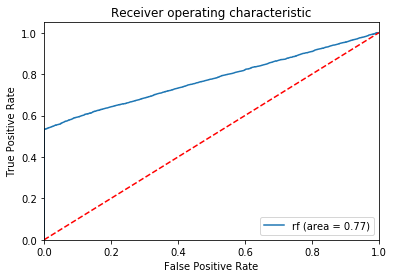

In [0]:
roc_plot(rf_grid.best_estimator_,X_test,y_test)

In [0]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\programdata\anaconda3\lib\site-packages (0.5.0)
Note: you may need to restart the kernel to use updated packages.


In [0]:
from imblearn.combine import SMOTEENN
comb_echant=SMOTEENN()

#%%
# on applique la méthode fit_sample() sur nos données
X_comb, y_comb= comb_echant.fit_sample(X_train, y_train)
# on le transforme en Series pour avoir un affichage plus agréable
pd.Series(y_comb).value_counts()

1    84796
0    70543
dtype: int64

In [0]:
rf_grid.fit(X_comb, y_comb)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='w

In [0]:
rf_grid.score(X_test,y_test)

0.948669872501875

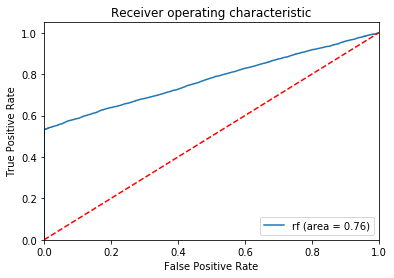

In [0]:
roc_plot(rf_grid.best_estimator_,X_test,y_test)

In [0]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(class_weight="balanced") # on définit le modèle de régression logistique à appliquer aux données

logisticreg.fit(X_train, y_train) # estimation du modèle
logisticreg.score(X_test, y_test) # la précision du modèle

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6532624520227643

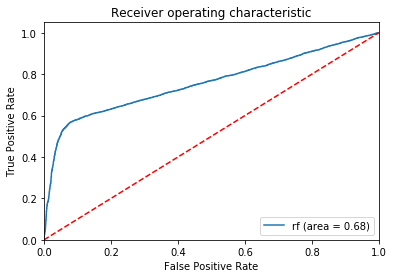

In [0]:
roc_plot(logisticreg,X_test,y_test)

In [0]:
import xgboost as xgb

In [0]:
xgb_model = xgb.XGBClassifier(weight="balanced",learning_rate =0.1,
 n_estimators=500,
 max_depth=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1, random_state=42)

#xgb_model.fit(X, y)

#y_pred = xgb_model.predict(X)

In [0]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1, weight='balanced')

In [0]:
xgb_model.score(X_test,y_test)

0.9562579962059381

In [0]:
y_pred = xgb_model.predict(X_test)

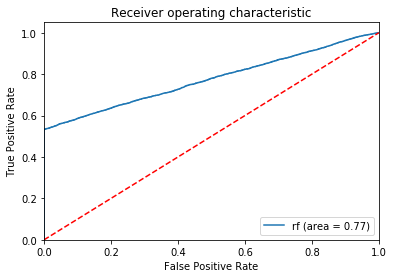

In [0]:
roc_plot(xgb_model,X_test,y_test)

In [0]:
type(X_test)

numpy.ndarray

In [0]:
res = pd.DataFrame(X_test,columns = fraud_final.drop("class", 1).columns)

In [0]:
rep = pd.DataFrame(y_test)

In [0]:
res.head()

,purchase_value,age,elapse,cl_country,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,0.709000,-0.712272,-1.171825,0.091482,1.235550,-0.504861,-0.818360,1.206370,-0.440627,-0.565523,-0.157738,-0.442171,-0.844445,0.844445
1,1.254316,1.141733,1.002252,0.091482,-0.809356,-0.504861,1.221956,1.206370,-0.440627,-0.565523,-0.157738,-0.442171,-0.844445,0.844445
2,-0.708822,-0.712272,1.296985,-0.358884,-0.809356,-0.504861,1.221956,1.206370,-0.440627,-0.565523,-0.157738,-0.442171,1.184210,-1.184210
3,-0.163506,0.214730,0.301571,0.091482,1.235550,-0.504861,-0.818360,1.206370,-0.440627,-0.565523,-0.157738,-0.442171,-0.844445,0.844445
4,0.545405,-1.291648,-0.649870,0.091482,-0.809356,-0.504861,1.221956,-0.828933,2.269493,-0.565523,-0.157738,-0.442171,-0.844445,0.844445


In [0]:
m = y_test==y_pred

In [0]:
y_test[m==False].index

Int64Index([  3066,  87588,  36361,  26860, 130904,  70567,  14633,  49860,
            137915, 134807,
            ...
             86987, 142413,  91380,  88618, 107804,  96572,  47554, 113131,
            150681,  99146],
           dtype='int64', length=1983)

In [0]:
fraud.iloc[y_test[m!=True].index,:][fraud["class"] == 1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country,elapse,cl_country
3066,232702,2015-01-18 18:50:34,2015-04-27 12:24:20,38,SRVANJHTSJCZT,SEO,IE,M,42,1,United States,63226,0.095626
87588,250152,2015-08-02 15:54:44,2015-08-12 04:25:37,62,BDDJUCORUOPAU,Ads,Safari,M,40,1,China,45053,0.086642
36361,149049,2015-01-06 08:32:21,2015-04-03 04:18:28,22,ENAZEJHJSBHVK,Direct,IE,M,21,1,United States,71167,0.095626
26860,157374,2015-07-04 01:09:27,2015-09-12 04:14:03,42,UHWPAJWLAGLGN,SEO,Chrome,F,41,1,United States,11076,0.095626
130904,318465,2015-06-01 00:35:50,2015-09-20 06:00:46,29,PKHGEZJLBHTEC,SEO,Safari,M,33,1,Indonesia,19496,0.087827
70567,351754,2015-04-16 01:12:39,2015-04-26 01:35:11,33,PIZWWHLXIOKJH,SEO,Chrome,F,24,1,United States,1352,0.095626
14633,357082,2015-07-06 03:40:46,2015-08-12 06:37:59,40,TSRENYKXKNWPT,Ads,Chrome,M,37,1,Japan,10633,0.097865
49860,8622,2015-06-19 09:12:10,2015-07-20 11:17:35,35,JHPSKXXWEFNVD,Direct,Chrome,F,25,1,Germany,7525,0.071860
137915,345214,2015-08-15 22:15:07,2015-11-10 09:08:08,55,RNGDNPMOVBGII,SEO,IE,M,19,1,United States,39181,0.095626
134807,208295,2015-01-04 19:20:25,2015-04-04 14:27:42,57,YVEWGCCFLSTXS,SEO,Chrome,F,48,1,United States,68837,0.095626


In [0]:
fraud.iloc[y_test[m==True].index,:][((fraud["class"] == 1)  & (fraud.elapse > 1))]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country,elapse,cl_country


Comment améliorer ce modèle. N'est t'on pas passé a coté de quelque chose

In [0]:
fraud_full.device_id.describe()

count            151112
unique           137956
top       NGQCKIADMZORL
freq                 20
Name: device_id, dtype: object

In [0]:
fraud_full.device_id[fraud_full["class"] == 1].describe()

count             14151
unique             6987
top       ITUMJCKWEYNDD
freq                 19
Name: device_id, dtype: object

In [0]:
fraud_full.device_id[fraud_full["class"] == 1].duplicated().sum()

7164

In [0]:
fraud_full[fraud_full.device_id == "NGQCKIADMZORL"]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
13973,278428,2015-01-03 13:10:40,2015-01-03 13:10:41,42,NGQCKIADMZORL,SEO,FireFox,F,34,2.050964e+09,1
17397,53591,2015-01-03 13:10:43,2015-01-03 13:10:44,42,NGQCKIADMZORL,SEO,FireFox,F,34,2.050964e+09,1
17551,384595,2015-01-03 13:10:35,2015-01-03 13:10:36,42,NGQCKIADMZORL,SEO,FireFox,F,34,2.050964e+09,1
19324,181018,2015-01-03 13:10:41,2015-01-03 13:10:42,42,NGQCKIADMZORL,SEO,FireFox,F,34,2.050964e+09,1
23254,226646,2015-01-03 13:10:51,2015-01-03 13:10:52,42,NGQCKIADMZORL,SEO,FireFox,F,34,2.050964e+09,1
23670,381483,2015-01-03 13:10:49,2015-01-03 13:10:50,42,NGQCKIADMZORL,SEO,FireFox,F,34,2.050964e+09,1
27888,277313,2015-01-03 13:10:45,2015-01-03 13:10:46,42,NGQCKIADMZORL,SEO,FireFox,F,34,2.050964e+09,1
62937,186785,2015-01-03 13:10:52,2015-01-03 13:10:53,42,NGQCKIADMZORL,SEO,FireFox,F,34,2.050964e+09,1
64799,38749,2015-01-03 13:10:44,2015-01-03 13:10:45,42,NGQCKIADMZORL,SEO,FireFox,F,34,2.050964e+09,1
68063,179901,2015-01-03 13:10:50,2015-01-03 13:10:51,42,NGQCKIADMZORL,SEO,FireFox,F,34,2.050964e+09,1


In [0]:
#fraud.iloc[y_test[m==False].index,:].device.value_counts()

In [0]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country,elapse,cl_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,Japan,13882,0.097865
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,United States,17944,0.095626
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,United States,1,0.095626
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,unknown,60085,0.085723
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,United States,41461,0.095626


In [0]:
fraud.iloc[y_test[m==True].index,:].source.value_counts()

SEO       17433
Ads       17266
Direct     8652
Name: source, dtype: int64

In [0]:
fraud.iloc[y_test[m==True].index,:].groupby(by="source").sum()

,user_id,purchase_value,age,class,elapse,cl_country
source,,,,,,
Ads,3462483682,635016,572741,908,706252707,1616.674298
Direct,1732853505,319553,287611,474,348953667,809.158348
SEO,3502180079,640104,576293,881,712529309,1636.427908


In [0]:
X_train_dis = pd.DataFrame(X_train, columns=fraud_final.drop("class",axis =1).columns)
X_train_dis.head()

X_test_dis = pd.DataFrame(X_test, columns=fraud_final.drop("class",axis =1).columns)


In [0]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
X_train_dis.age = est.fit_transform(X_train_dis.age.values.reshape(-1, 1))   
X_test_dis.age = est.fit_transform(X_test_dis.age.values.reshape(-1, 1))   

X_train_dis.purchase_value = est.fit_transform(X_train_dis.purchase_value.values.reshape(-1, 1))   
X_test_dis.purchase_value = est.fit_transform(X_test_dis.purchase_value.values.reshape(-1, 1))   
#X_test.age = est.transform(X_test.age)

In [0]:
X_train_dis.shape

(105778, 14)

In [0]:
xgb_model.fit(X_train_dis, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1, weight='balanced')

In [0]:
xgb_model.score(X_test_dis,y_test)

0.9562800547050778

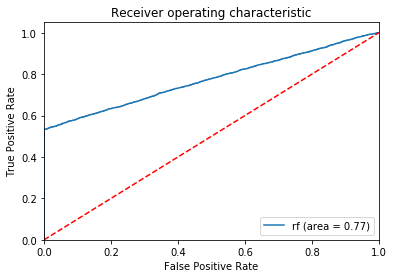

In [0]:
roc_plot(xgb_model,X_test_dis,y_test)

traitement des device id

In [0]:
fraud_final["device"] = fraud_full.device_id.duplicated()

In [0]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country,elapse,cl_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,Japan,13882,0.097865
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,United States,17944,0.095626
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,United States,1,0.095626
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,unknown,60085,0.085723
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,United States,41461,0.095626


In [0]:
fraud_final.head()

,purchase_value,age,class,elapse,cl_country,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,device
0,34,39,0,13882,0.097865,0,0,1,1,0,0,0,0,0,1,False
1,16,53,0,17944,0.095626,1,0,0,1,0,0,0,0,1,0,False
2,15,53,1,1,0.095626,0,0,1,0,0,0,1,0,0,1,False
3,44,41,0,60085,0.085723,0,0,1,0,0,0,0,1,0,1,False
4,39,45,0,41461,0.095626,1,0,0,0,0,0,0,1,0,1,False


In [0]:
X = fraud_final.drop("class",axis =1)
y = fraud_final["class"]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:

parameters = {'n_estimators':[20,50,100], 'max_depth':[ 3, 5]}
rf_grid = GridSearchCV(rf, parameters, cv=5)
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='w

In [0]:
rf_grid.best_estimator_.score(X_test,y_test)

0.9326333436272995

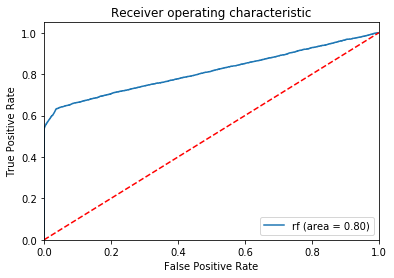

In [0]:
roc_plot(rf_grid.best_estimator_,X_test,y_test)

In [0]:
d = pd.DataFrame(fraud_full.device_id.value_counts()).reset_index().rename(columns= {"index":"device_id","device_id":"count"})

In [0]:
comp = fraud_full.groupby(by="device_id").sum().sort_values(by="purchase_value",ascending=False)

In [0]:
comp.head()

,user_id,purchase_value,age,ip_address,class
device_id,,,,,
KPAAACGRQWYIK,4113295,1458,432,3.311546e+09,17
UOMHJMHDVTLAS,3442096,1376,288,3.272740e+10,15
EQYVNEGOFLAWK,3661993,1369,744,3.500421e+10,19
KHHAMKJCMODJA,3222535,1320,405,5.028436e+10,14
TZSHXHDMKLRYJ,2871784,1288,252,8.423327e+09,13


In [0]:
def find_device(x) :
    return comp.query('device_id ==  @x').purchase_value.values[0]

In [0]:
def find_device_n(x) :
    return d.query('device_id ==  @x')["count"].values[0]

In [0]:
re =find_device_n("ZEJDOWBUFHCVR")
re

1

In [0]:
#fraud['device_by_purchase'] = fraud_full.device_id.apply(lambda x: find_device(x))

In [0]:
#fraud_device['device_by_count'] = fraud_full.device_id.apply(lambda x: find_device_n(x))

In [0]:
#fraud[fraud["class"] == 1].device.value_counts()

In [0]:
#fraud.to_csv("fraud_data_country3.csv")

In [0]:
fraud_device = pd.read_csv("Fraud_Data_country4.csv")

In [0]:
#fraud_device = fraud_device.drop("Unnamed: 0.1",axis = 1)

In [0]:
fraud_device.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,class,country,elapse,cl_country,device,device_by_purchase,device_by_count
0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,SEO,Chrome,M,39,0,Japan,13882,0.097865,False,34,1
1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,Ads,Chrome,F,53,0,United States,17944,0.095626,False,16,1
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,SEO,Opera,M,53,1,United States,1,0.095626,False,180,12
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,SEO,Safari,M,41,0,unknown,60085,0.085723,False,44,1
4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,Ads,Safari,M,45,0,United States,41461,0.095626,False,39,1


In [0]:
#fraud_device.to_csv("fraud_data_country4.csv",index  = False)

In [0]:
fraud_device = fraud_device.drop(["signup_time","purchase_time","country"],axis = 1)

In [0]:

fraud_device = pd.get_dummies(fraud_device)

In [0]:
fraud_device.shape

(151112, 18)

In [0]:
X = fraud_device.drop("class",axis =1)
y = fraud_device["class"]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:

parameters = {'n_estimators':[20,50,100], 'max_depth':[ 3, 5]}
rf_grid = GridSearchCV(rf, parameters, cv=5)
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='w

In [0]:
rf_grid.best_estimator_.score(X_test,y_test)

0.9136630343671417

In [0]:
X.head()

,purchase_value,age,elapse,cl_country,device,device_by_purchase,device_by_count,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,34,39,13882,0.097865,False,34,1,0,0,1,1,0,0,0,0,0,1
1,16,53,17944,0.095626,False,16,1,1,0,0,1,0,0,0,0,1,0
2,15,53,1,0.095626,False,180,12,0,0,1,0,0,0,1,0,0,1
3,44,41,60085,0.085723,False,44,1,0,0,1,0,0,0,0,1,0,1
4,39,45,41461,0.095626,False,39,1,1,0,0,0,0,0,0,1,0,1


In [0]:
rf_grid.best_estimator_.feature_importances_.round(3)

array([0.002, 0.001, 0.162, 0.003, 0.259, 0.199, 0.371, 0.   , 0.002,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

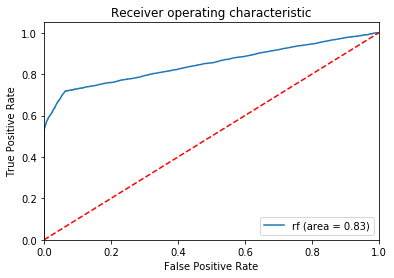

In [0]:
roc_plot(rf_grid.best_estimator_,X_test,y_test)

In [0]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country,elapse,cl_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,Japan,13882,0.097865
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,United States,17944,0.095626
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,United States,1,0.095626
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,unknown,60085,0.085723
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,United States,41461,0.095626


In [0]:
fraud.signup_time = pd.to_datetime(fraud.signup_time)
fraud.purchase_time = pd.to_datetime(fraud.purchase_time)

fraud_device['p_year'] = fraud.purchase_time.apply(lambda x: x.year)
fraud_device['p_month'] = fraud.purchase_time.apply(lambda x: x.month)
fraud_device['p_day'] = fraud.purchase_time.apply(lambda x: x.day)

In [0]:
import calendar

fraud_device['weekday'] = 0

for i in range(len(fraud_device)):
   fraud_device.weekday[i] = calendar.weekday(fraud_device.p_year[i], fraud_device.p_month[i], fraud_device.p_day[i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
fraud_device.head()

,purchase_value,age,class,elapse,cl_country,device,device_by_purchase,device_by_count,source_Ads,source_Direct,...,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,p_year,p_month,p_day
0,34,39,0,13882,0.097865,False,34,1,0,0,...,1,0,0,0,0,0,1,2015,4,18
1,16,53,0,17944,0.095626,False,16,1,1,0,...,1,0,0,0,0,1,0,2015,6,8
2,15,53,1,1,0.095626,False,180,12,0,0,...,0,0,0,1,0,0,1,2015,1,1
3,44,41,0,60085,0.085723,False,44,1,0,0,...,0,0,0,0,1,0,1,2015,5,4
4,39,45,0,41461,0.095626,False,39,1,1,0,...,0,0,0,0,1,0,1,2015,9,9


In [0]:
X = fraud_device.drop("class",axis =1)
y = fraud_device["class"]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
parameters = {'n_estimators':[20,30,50,100], 'max_depth':[ 2,3,5]}
rf_grid = GridSearchCV(rf, parameters, cv=5)
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='w

In [0]:
rf_grid.best_estimator_.score(X_test,y_test)

0.9136630343671417

In [0]:
rf_grid.best_params_

{'max_depth': 5, 'n_estimators': 20}

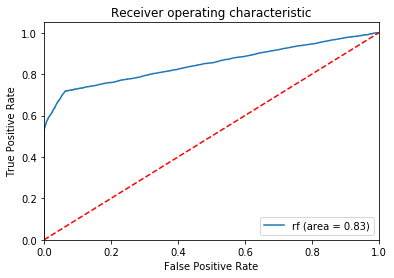

In [0]:
roc_plot(rf_grid.best_estimator_,X_test,y_test)

In [0]:
#ADABOOST

In [0]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier( random_state=42)

parameters = {'n_estimators':[20,50,100,200]}
ada_grid = GridSearchCV(adaboost, parameters, cv=5)
ada_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [20, 50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
ada_grid.best_estimator_.score(X_test,y_test)

0.9562800547050778

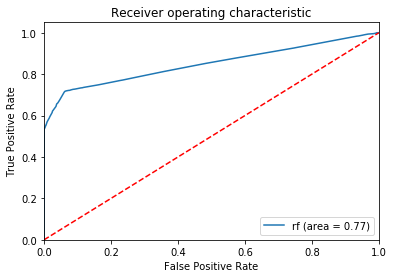

In [0]:
roc_plot(ada_grid.best_estimator_,X_test,y_test)

In [0]:
#XGBOOST

In [0]:
xgb_model

In [0]:
parameters = {'n_estimators':[20,50,100,200]}
xgb_grid = GridSearchCV(xgb_model, parameters, cv=5)
xgb_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.8, verbosity=1,
                                     weight='balanced'),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [20, 50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=Tru

In [0]:
xgb_grid.best_estimator_.score(X_test,y_test)

0.9562800547050778

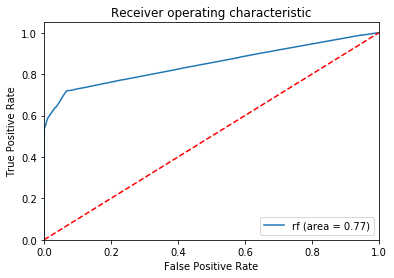

In [0]:
roc_plot(xgb_grid.best_estimator_,X_test,y_test)

In [0]:
from mlxtend.classifier import StackingClassifier

In [0]:
sclf = StackingClassifier(classifiers=[rf_grid.best_estimator_, ada_grid.best_estimator_, xgb_grid.best_estimator_], 
                          meta_classifier=rf_grid.best_estimator_)



In [0]:
sclf.fit(X_train,y_train)

StackingClassifier(average_probas=False,
                   classifiers=[RandomForestClassifier(bootstrap=True,
                                                       class_weight='balanced',
                                                       criterion='gini',
                                                       max_depth=5,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=20,
                                             

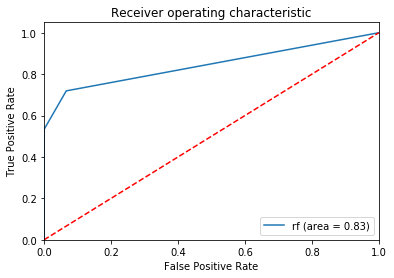

In [0]:
roc_plot(sclf,X_test,y_test)

In [0]:
sclf.score(X_test,y_test)

0.9136630343671417

In [0]:
X_train['pu_age'] = X_train.purchase_value * X_train.age
X_train['pu_elaspe'] = X_train.purchase_value * X_train.elapse
X_train['pu_clcountry'] = X_train.purchase_value * X_train.cl_country
X_train['elaspe_country'] = X_train.cl_country * X_train.elapse
X_train['age_clcountry'] = X_train.age * X_train.cl_country

X_test['pu_age'] = X_test.purchase_value * X_test.age
X_test['pu_elaspe'] = X_test.purchase_value * X_test.elapse
X_test['pu_clcountry'] = X_test.purchase_value * X_test.cl_country
X_test['elaspe_country'] = X_test.cl_country * X_test.elapse
X_test['age_clcountry'] = X_test.age * X_test.cl_country
